## Dados Globais de Violência Contra Mulheres

### Introdução

Em dezembro de 2006, a Assembleia Geral das Nações Unidas adotou uma resolução para intensificar os esforços na eliminação da violência contra as mulheres e solicitou a criação de um banco de dados sobre o tema. Este banco de dados foi lançado em 2009 como “Banco de Dados do Secretário-Geral da ONU sobre Violência contra as Mulheres”. 

Em 2016, com a adoção da Agenda 2030 para o Desenvolvimento Sustentável, a ONU Mulheres relançou o banco de dados como “Banco de Dados Global sobre Violência contra as Mulheres”. 

Em 2024, o banco de dados foi redesenhado para facilitar a navegação dos usuários.

O banco de dados inclui informações de 193 Estados-membros da ONU, cada um relatando pelo menos uma medida de combate à violência contra as mulheres. A violência contra as mulheres é definida pela ONU como qualquer ato de violência baseado no gênero que cause ou possa causar dano físico, sexual ou psicológico às mulheres.

São 193 Estados-membros das Nações Unidas inclusos no banco de dados. Cada um destes Estados-Membros comunicou pelo menos uma medida de combate à violência contra as mulheres através de relatórios oficiais.

As Nações Unidas definem a violência contra as mulheres como "qualquer ato de violência baseada no gênero que resulte ou possa resultar em dano ou sofrimento físico, sexual ou psicológico às mulheres, incluindo ameaças de tais atos, coerção ou privação arbitrária de liberdade, ocorrendo na vida pública ou privada" (Resolução 48/104 da Assembleia Geral Declaração sobre a Eliminação da Violência contra as Mulheres, 1993).

Disponível em https://data.unwomen.org/global-database-on-violence-against-women/data-form

### Motivação

Encontrar um banco de dados com informações globais e como mulheres achamos interessante para descobrir como são tratatadas essas informações.

### Tratamento de Dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 


In [3]:
df_backup = pd.read_csv('Data_Map_export.csv')


In [4]:
df_backup.shape

(7440, 13)

In [5]:
df = df_backup.copy()
df.shape

(7440, 13)

In [6]:
nulos = df.isnull().sum()
print(nulos)

Template               0
Year                 716
Region                 3
Form of Violence       5
Type of Measure        4
Country                0
Title                  0
Unnamed: 7          7408
Unnamed: 8          7431
Unnamed: 9          7436
Unnamed: 10         7436
Unnamed: 11         7436
Unnamed: 12         7436
dtype: int64


In [7]:
valores_unicos = df['Template'].unique()
print(valores_unicos)

['Measure']


In [8]:
valores_unicos = df['Unnamed: 12'].unique()
print(valores_unicos)

[nan
 'State Fund for the Protection of and Assistance to Victims of Trafficking in Persons'
 'Amendment of Code of Criminal Procedure'
 'Act No. 119/2013 on Gender-Based Violence and Stalking'
 'Corporate Alliance against Gender Violence']


In [9]:
df.columns

Index(['Template', 'Year', 'Region', 'Form of Violence', 'Type of Measure',
       'Country', 'Title', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [10]:
#apagar colunas
df.drop(['Template','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [11]:
df.columns

Index(['Year', 'Region', 'Form of Violence', 'Type of Measure', 'Country',
       'Title'],
      dtype='object')

In [12]:
nulos = df.isnull().sum()
print(nulos)

Year                716
Region                3
Form of Violence      5
Type of Measure       4
Country               0
Title                 0
dtype: int64


In [13]:
duplicados = df.duplicated().sum()
print(duplicados)


1


In [15]:
df.drop_duplicates(inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7440 entries, 0 to 7439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              6724 non-null   float64
 1   Region            7437 non-null   object 
 2   Form of Violence  7435 non-null   object 
 3   Type of Measure   7436 non-null   object 
 4   Country           7440 non-null   object 
 5   Title             7440 non-null   object 
dtypes: float64(1), object(5)
memory usage: 348.9+ KB


In [16]:
df.describe()

,Year
count,6723.000000
mean,2008.097724
std,9.278981
min,1789.000000
25%,2005.000000
50%,2009.000000
75%,2014.000000
max,2022.000000


In [17]:
df.columns

Index(['Year', 'Region', 'Form of Violence', 'Type of Measure', 'Country',
       'Title'],
      dtype='object')

In [18]:
#renomear as colunas

df.rename(columns={
    'Year': 'Ano', 
    'Region': 'Continente', 
    'Form of Violence' : 'Forma de Violencia', 
    'Type of Measure': 'Tipos de Medida', 
    'Country': 'Pais',
    'Title': 'Titulo'
    }, inplace=True)

In [19]:
df.head(20)

,Ano,Continente,Forma de Violencia,Tipos de Medida,Pais,Titulo
0,1984.0,Africa,Sexual violence,Laws > Violence against women > Legislation,Algeria,Article 336 of the Penal Code
1,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 34 of the Constitution
2,1996.0,Africa,Violence against women and girls,Laws > Violence against women > Constitutional...,Algeria,Article 35 of the Constitution
3,2000.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Association Femmes En Communication - Actions ...
4,2000.0,Africa,Domestic violence/Intimate partner violence,Research and statistical data > Other research...,Algeria,Lancement De La Stratégie Nationale De Lutte C...
5,2001.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Administrative...,Algeria,Police Survey on Violence against Women
6,2002.0,Africa,Violence against women and girls,Services > Social services > Shelter Safe acco...,Algeria,Hébergement Temporaires
7,2002.0,Africa,Domestic violence/Intimate partner violence; \...,Research and statistical data > Dedicated viol...,Algeria,L'enquête Nationale Sur La Violence À L'encont...
8,2003.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Atelier Portant Sur « L'analyse De La Situatio...
9,2004.0,Africa,Violence against women and girls,Prevention > Awareness-raising Campaigns,Algeria,Journée Internationale Pour L'élimination De L...


In [22]:
#substitui o tipo float por int

df['Ano'] = df['Ano'].astype(int)

In [21]:
#substitui valores nulos por zero

df['Ano'] = df['Ano'].fillna(0)

In [23]:
#separa a medição que está e cria novas colunas

medicao_separada = df['Tipos de Medida'].str.split(' > ', expand=True)
medicao_separada.columns = ['Medicao Nivel 1', 'Medicao Nivel 2', 'Medicao Nivel 3']
df = pd.concat([df, medicao_separada], axis=1)

In [24]:
df.columns

Index(['Ano', 'Continente', 'Forma de Violencia', 'Tipos de Medida', 'Pais',
       'Titulo', 'Medicao Nivel 1', 'Medicao Nivel 2', 'Medicao Nivel 3'],
      dtype='object')

In [74]:
df.describe()

,Ano
count,7439.000000
mean,1814.819331
std,592.359971
min,0.000000
25%,2003.000000
50%,2008.000000
75%,2013.000000
max,2022.000000


In [25]:
df.to_csv('woman_tratado.csv', index=False)

### Análise dos Dados

Quais os paises que mais tem registros de casamento infantil e forçado

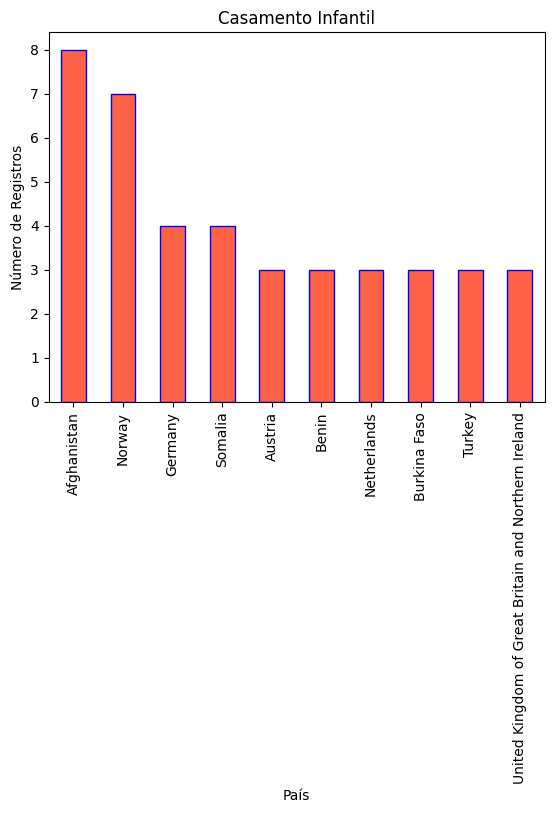

In [26]:
#plotagem
df_filtrado = df[df["Forma de Violencia"] == "Child early and forced marriage"]
contagem_paises = df_filtrado["Pais"].value_counts()
top_10_paises = contagem_paises.head(10)

top_10_paises.plot(kind="bar", edgecolor="blue", color="tomato")

#rotulos
plt.xlabel("País")
plt.ylabel("Número de Registros")
plt.title("Casamento Infantil")
plt.xticks(rotation=90)
plt.show()

Evolução dos registros de violência 

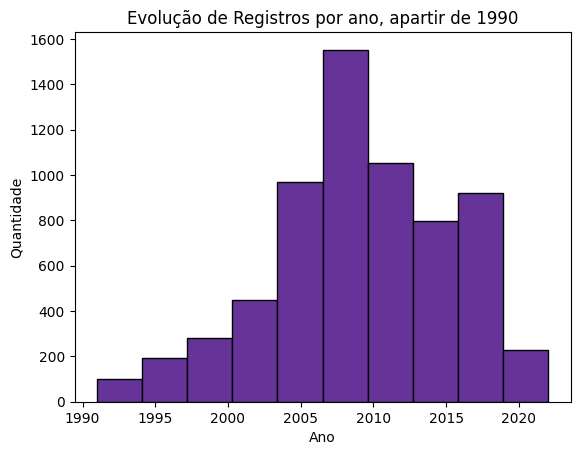

In [27]:
ano_filtrado = df[df['Ano'] > 1990]

ano_filtrado["Ano"].plot.hist(edgecolor="black", color="rebeccapurple")

plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.title("Evolução de Registros por ano, apartir de 1990")

plt.show()

15 país que mais registram casos de violência contra mulher 

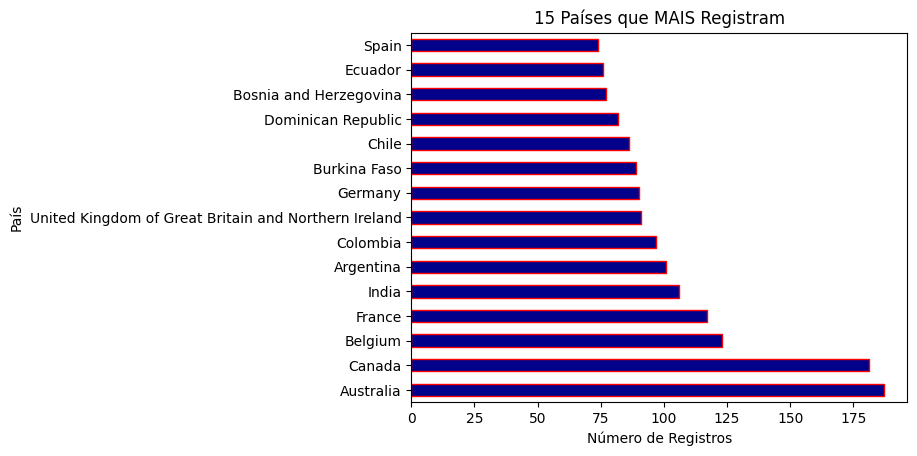

In [41]:
contagem_paises = df["Pais"].value_counts()
top_10_paises = contagem_paises.head(15)

top_10_paises.plot(kind="barh", edgecolor="red", color="darkblue")
plt.ylabel("País")
plt.xlabel("Número de Registros")
plt.title("15 Países que MAIS Registram")
plt.xticks(rotation=0)
plt.show()

Quais 15 paises que menos registram violência contra a mulher

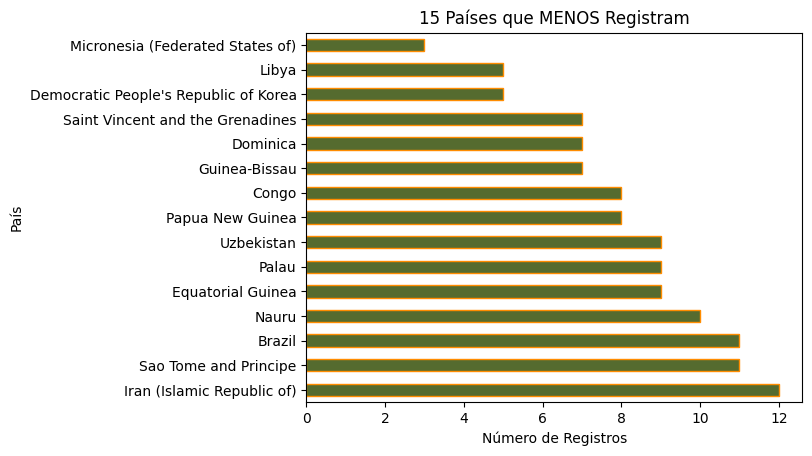

In [39]:
contagem_paises = df["Pais"].value_counts()
top_10_paises = contagem_paises.tail(15)

top_10_paises.plot(kind="barh", edgecolor="darkorange", color="darkolivegreen")
plt.ylabel("País")
plt.xlabel("Número de Registros")
plt.title("15 Países que MENOS Registram")
plt.xticks(rotation=0)
plt.show()

### Teste de Hipótese

 Hipótese Nula H0: O Brasil NÃO está entre os países que mais registram 
 
 Hipótese Alternativa H1: O Brasil está entre os países que mais registram 

In [45]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 6.9 MB/s eta 0:00:02
   - -------------------------------------- 0.3/9.8 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/9.8 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.8 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.8 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/9.8 MB 3.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.8 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.7/9.8 MB 3.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.8 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.7 MB/s eta 0:00:03
   --------- ------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
from statsmodels.stats.weightstats import ztest

In [81]:
# Filtrando os dados 
contagem_brazil = df[df["Pais"] == "Brazil"].value_counts()

#Teste Z
stats, valor_p = ztest(x1=contagem_brazil, value=70, alternative="larger")

print("Teste Z de Brasil")
print(f"Estatística Z: {stats}")
print(f"Valor P: {valor_p}")

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula. O Brasil está entre os países que mais registram casos de violência.")
else:
    print("Aceitamos a hipótese nula. O Brasil NÃO está entre os países que mais registram casos de violência.")

Teste Z de Brasil
Estatística Z: -inf
Valor P: 1.0
Aceitamos a hipótese nula. O Brasil NÃO está entre os países que mais registram casos de violência.


c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\weightstats.py:748: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = (value1 - value2 - diff) / std_diff
